In [1]:
import sys  
sys.path.insert(0, '../../')

from sampling.smc import Sampler
import jax
import jax.numpy as jnp

kb = 1.38e-23

temp_init = 1000.0 #* kb
temp_final = 1.0 #* kb

class StandardNormal():
    """Standard Normal distribution in d dimensions"""

    def __init__(self, d):
        self.d = d
        self.grad_nlogp = jax.value_and_grad(self.nlogp)

    def nlogp(self, x):
        """- log p of the target distribution"""
        return 0.5 * jnp.sum(jnp.square(x), axis= -1)

    def prior_draw(self, key):
        return jax.random.normal(key, shape = (self.d, ), dtype = 'float64') * jnp.sqrt(temp_init) #start from the distribution at high temperature


target = StandardNormal(d = 10)

sampler = Sampler(target)

x = sampler.sample(steps_at_each_temp = 1000, tune_steps= 100, num_chains= 1000, temp_init=temp_init, temp_final=temp_final, ess=0.8)

print(x)

T: 792.3941650390625
T: 630.202880859375
T: 501.9044189453125
T: 399.2867736816406
T: 312.9793395996094
T: 237.50889587402344
T: 171.2333526611328
T: 120.62891387939453
T: 86.34713745117188
T: 62.61722946166992
T: 45.722679138183594
T: 33.66250228881836
T: 25.273513793945312
T: 19.35277557373047
T: 15.026819229125977
T: 11.819178581237793
T: 9.344698905944824
T: 7.382066249847412
T: 5.861446857452393
T: 4.669811248779297
T: 3.704078435897827
T: 2.8659186363220215
T: 2.201890230178833
T: 1.7549172639846802
T: 1.3860396146774292
T: 1.0907856225967407
T: 1.0
[[ 0.26010802  1.3392242  -0.69521457 ... -1.1771035  -0.9907378
   1.5732666 ]
 [ 0.6596817   1.5439816   0.2550472  ... -0.16553336 -0.6179378
   1.2421314 ]
 [ 0.72630167 -0.25226235 -0.7142753  ... -1.3142614   1.5843642
   1.245974  ]
 ...
 [ 1.1087224   0.9457538  -1.1830904  ...  1.0587435  -0.5046867
   0.1339251 ]
 [ 0.04191879  0.91622573 -0.896403   ... -0.47026187 -0.5539253
   0.21780129]
 [-0.83515453 -1.0613788  -1.5193

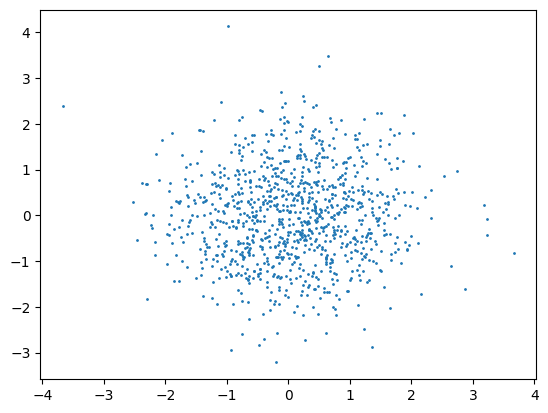

In [2]:
import matplotlib.pyplot as plt 

plt.scatter(x[:,0], x[:,1], s=1);

In [3]:
jnp.std(x, axis=0)

Array([0.9859577, 1.0408971, 0.9739919, 1.0553006, 1.001077 , 1.0783161,
       1.0134192, 0.9867602, 1.073875 , 0.9882714], dtype=float32)

In [4]:
jnp.var(x, axis=0)

Array([0.9721126 , 1.0834669 , 0.9486602 , 1.1136594 , 1.0021553 ,
       1.1627655 , 1.0270183 , 0.9736957 , 1.1532073 , 0.97668034],      dtype=float32)